In [1]:
# Import required packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist 
from sklearn import preprocessing as prp
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
pd.options.mode.chained_assignment = None

In [2]:
cms_dataset = pd.read_table("~/Documents/ds7374_ba/Data/cms_dataset.txt")

# read csv file as pandas dataframe
#df_17_census = pd.read_csv('../Data/acs2017_census_tract_data.csv')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# EDA

cms_dataset.shape

(9316308, 26)

In [4]:
cms_dataset.dtypes

npi                                   int64
nppes_provider_last_org_name         object
nppes_provider_first_name            object
nppes_provider_mi                    object
nppes_credentials                    object
nppes_provider_gender                object
nppes_entity_code                    object
nppes_provider_street1               object
nppes_provider_street2               object
nppes_provider_city                  object
nppes_provider_zip                   object
nppes_provider_state                 object
nppes_provider_country               object
provider_type                        object
medicare_participation_indicator     object
place_of_service                     object
hcpcs_code                           object
hcpcs_description                    object
hcpcs_drug_indicator                 object
line_srvc_cnt                       float64
bene_unique_cnt                     float64
bene_day_srvc_cnt                   float64
average_Medicare_allowed_amt    

In [5]:
cms_dataset.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt
0,1,CPT copyright 2013 American Medical Associatio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99222,"Initial hospital inpatient care, typically 50 ...",N,357.0,341.0,357.0,141.05,416.546218,107.517871,106.731232
2,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99223,"Initial hospital inpatient care, typically 70 ...",N,98.0,98.0,98.0,207.79,611.000000,152.551224,153.306837
3,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99231,"Subsequent hospital inpatient care, typically ...",N,104.0,65.0,104.0,40.10,119.000000,30.835385,30.708269
4,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,...,99232,"Subsequent hospital inpatient care, typically ...",N,1418.0,596.0,1418.0,73.66,217.000000,56.297757,56.098209


In [6]:
entitytab = cms_dataset.iloc[:,6].value_counts()

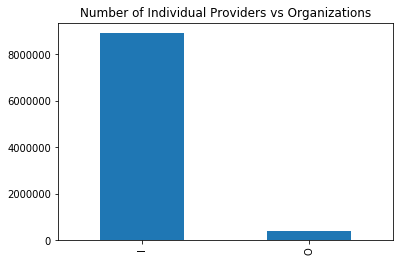

In [7]:
# Individual providers vs Organizations
entitytab.plot(kind='bar',title='Number of Individual Providers vs Organizations')

In [8]:
individuals = cms_dataset[cms_dataset['nppes_entity_code']=='I']

In [9]:
# Total Amount Paid by Medicare
cms_dataset.iloc[:,25].sum()

705087961.3249655

In [10]:
individuals.isnull().sum()

npi                                       0
nppes_provider_last_org_name            155
nppes_provider_first_name                52
nppes_provider_mi                   2107280
nppes_credentials                    188625
nppes_provider_gender                     0
nppes_entity_code                         0
nppes_provider_street1                    2
nppes_provider_street2              4863404
nppes_provider_city                       2
nppes_provider_zip                        0
nppes_provider_state                      0
nppes_provider_country                    0
provider_type                             0
medicare_participation_indicator          0
place_of_service                          0
hcpcs_code                                0
hcpcs_description                         0
hcpcs_drug_indicator                      0
line_srvc_cnt                             0
bene_unique_cnt                           0
bene_day_srvc_cnt                         0
average_Medicare_allowed_amt    

In [ ]:
individuals1 = individuals.dropna(axis=1, inplace = True)

In [ ]:
print (individuals1)

In [11]:
individuals['Full Name'] = individuals['nppes_provider_first_name'] + " " + individuals['nppes_provider_last_org_name']
individuals['Full Name'][0:10]

1     ARDALAN ENKESHAFI
2     ARDALAN ENKESHAFI
3     ARDALAN ENKESHAFI
4     ARDALAN ENKESHAFI
5     ARDALAN ENKESHAFI
6     ARDALAN ENKESHAFI
7     ARDALAN ENKESHAFI
8     ARDALAN ENKESHAFI
9         THOMAS CIBULL
10        THOMAS CIBULL
Name: Full Name, dtype: object

In [12]:
individuals.groupby(['Full Name', 'npi','nppes_provider_city','nppes_provider_state'])

In [13]:
individuals2 = individuals.groupby(['Full Name', 'npi','nppes_provider_city','nppes_provider_state'])['average_Medicare_standard_amt'].sum()

In [14]:
individuals3 = individuals2.sort_values(ascending=False)[0:10]
individuals3

Full Name          npi         nppes_provider_city  nppes_provider_state
STEPHEN LIU        1306889860  MODESTO              CA                      78267.817893
ASAD QAMAR         1033145487  OCALA                FL                      76163.852180
VASSO GODIALI      1861572000  BAY CITY             MI                      69394.084439
LARRY SPROUSE      1730173634  CHATTANOOGA          TN                      66147.137957
MUHAMMAD PARACHA   1619966249  FAYETTEVILLE         NC                      56207.504875
CHRISTOPHER LESAR  1285628917  CHATTANOOGA          TN                      56031.860981
SHRIKANTH UPADYA   1750492195  THE VILLAGES         FL                      54949.693726
DAVID LEW          1861485757  LEESBURG             FL                      52979.187368
PARAG DOSHI        1578544334  SCHAUMBURG           IL                      52705.230237
YAZAN KHATIB       1588653257  JACKSONVILLE         FL                      52136.478969
Name: average_Medicare_standard_amt, 

In [15]:
ind = individuals3.index
index = np.arange(10)

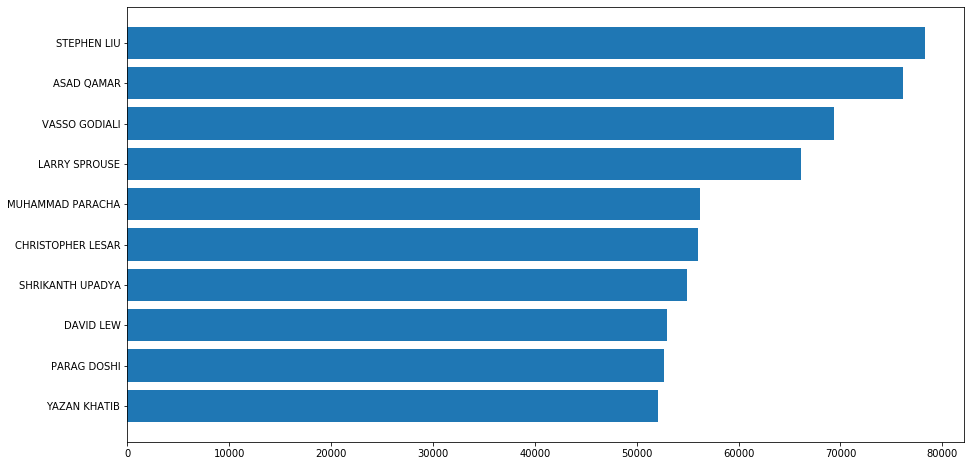

In [16]:
f, ax = plt.subplots(figsize=(15,8))
ax.barh(index,individuals3.values)
ax.set_yticks(index)
ax.set_yticklabels(ind.get_level_values(0))
ax.invert_yaxis()

In [17]:
individuals3 = individuals2.sort_values(ascending=False)
individuals4 = individuals3.to_frame().reset_index()

In [18]:
individuals4['cumsum'] = individuals4.iloc[:,4].cumsum()
individuals4[individuals4['cumsum'] > 350000000].head()

,Full Name,npi,nppes_provider_city,nppes_provider_state,average_Medicare_standard_amt,cumsum
123681,TAMELA TRIPP,1407842826,PHOENIX,AZ,1390.619054,3.500013e+08
123682,THOMAS CONNOLLY,1023031036,BOYS TOWN,NE,1390.574743,3.500027e+08
123683,ROBERT FREDERICKSON,1730146226,SEDALIA,MO,1390.566715,3.500041e+08
123684,AMIT BHOJRAJ,1942440276,GRANVILLE,OH,1390.566657,3.500054e+08
123685,ANDREW SORENSON,1326139981,BERKELEY,CA,1390.562066,3.500068e+08


In [20]:
states = individuals.groupby('nppes_provider_state')['average_Medicare_standard_amt']
states1 = states.sum().sort_values(ascending=False)[0:10]
individuals2 = individuals[individuals['nppes_provider_state'].isin(states1.index.get_values())]

//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
//anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


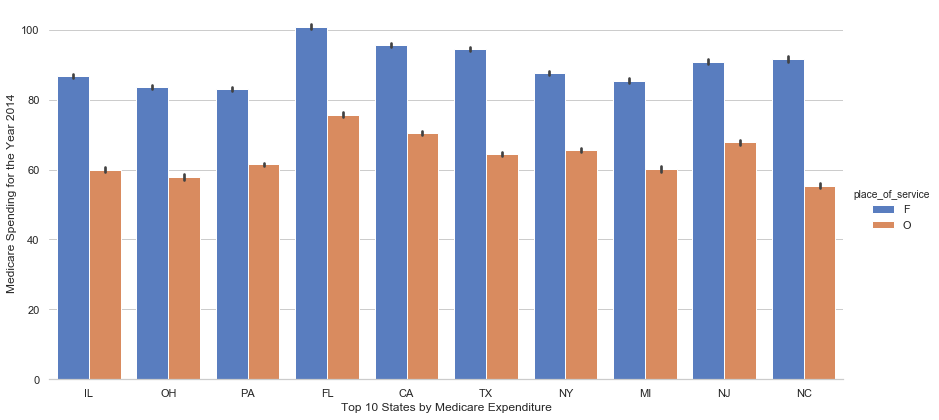

In [21]:
sns.set(style="whitegrid")
g = sns.factorplot(x="nppes_provider_state", y="average_Medicare_standard_amt", hue="place_of_service", data=individuals2,
                   size=6, aspect = 2, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Medicare Spending for the Year 2014")
g.set_xlabels("Top 10 States by Medicare Expenditure")

In [22]:
individuals['difference'] = individuals['average_submitted_chrg_amt'] - individuals['average_Medicare_allowed_amt']

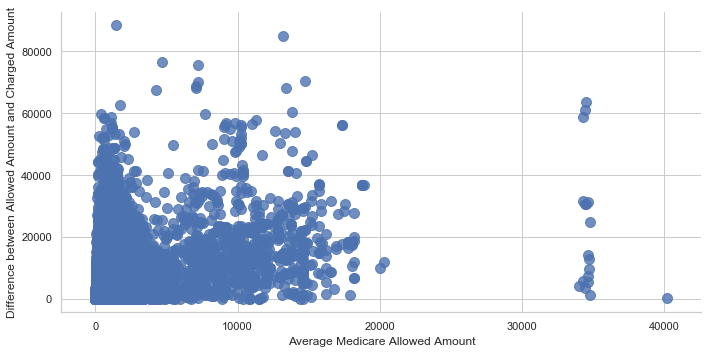

In [24]:
h = sns.lmplot('average_Medicare_allowed_amt', 
           'difference', 
           data=individuals, 
           fit_reg=False, aspect=2, 
           scatter_kws={"marker": "D",
                        "s": 100})
h.set_ylabels("Difference between Allowed Amount and Charged Amount")
h.set_xlabels("Average Medicare Allowed Amount")

In [25]:
costliestproc = individuals[individuals['average_Medicare_allowed_amt'] > 30000]['hcpcs_description']
costliestproc.unique()

array(['Factor viii (antihemophilic factor, recombinant) per i.u., not otherwise specified',
       'Sipuleucel-t, minimum of 50 million autologous cd54+ cells activated with pap-gm-csf, including leukapheresis and all other preparatory procedures, per infusion'],
      dtype=object)

In [26]:
procedures = individuals.groupby(['hcpcs_code','hcpcs_description'])['average_Medicare_standard_amt'].sum()
procedures1 = procedures.sort_values(ascending=False)[11:21]
proc2 = procedures1.index.get_level_values(1).tolist()

In [27]:
proc2 

['Repair of knee joint',
 'Injection, pegfilgrastim, 6 mg',
 'Emergency department visit, problem with significant threat to life or function',
 'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit',
 'Removal of cataract with insertion of lens',
 'Emergency department visit, problem of high severity',
 'Established patient office or other outpatient visit, typically 10 minutes',
 'Replacement of thigh bone and hip joint prosthesis',
 'Hospital discharge day management, more than 30 minutes',
 'Annual wellness visit; includes a personalized prevention plan of service (pps), initial visit']

In [28]:
proc3 = ['Knee Joint Repair','WBC drug','Emergency (Threat to Life)', 'Annual Wellness (Subsequent visit)',
        'Remove Cataract', 'Emergency (High Severity)', 'Outpatient(<10 mins)', '      Prosthetics Replace', 'Discharge', 'Annual Wellness (First Visit)']

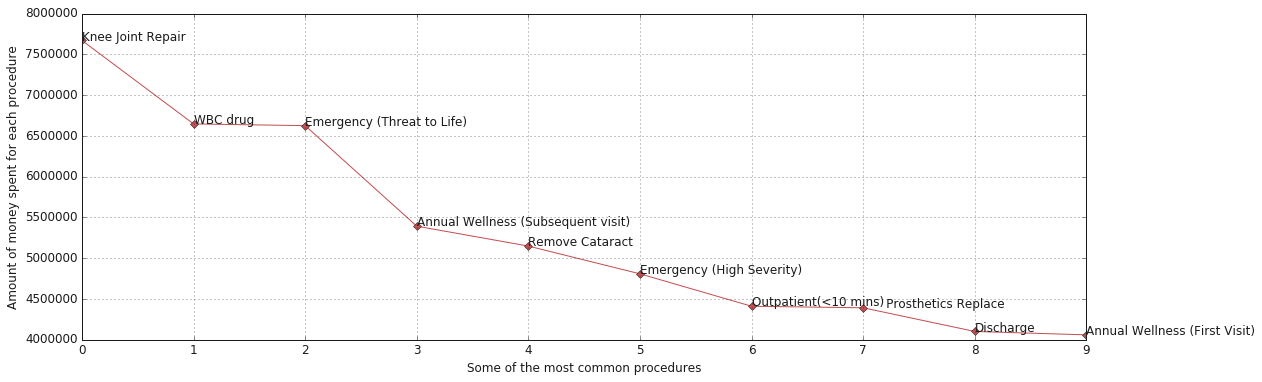

In [29]:
fig = plt.figure(figsize=(18,6))
plt.style.use('classic')
plt.plot(np.arange(10),procedures1.get_values(),'r-D')
plt.xlabel('Some of the most common procedures')
plt.ylabel('Amount of money spent for each procedure')
i = 0
for xy in zip(np.arange(10),procedures1.get_values()):                                      
    plt.annotate(proc3[i], xy=xy, textcoords='data')
    i = i +1
plt.grid()

In [31]:
cptone =  individuals[~individuals.hcpcs_code.str.contains('\D')]

In [32]:
cptone.hcpcs_code.str.contains('\D').value_counts()

False    8065811
Name: hcpcs_code, dtype: int64

In [33]:
cptone.hcpcs_code = cptone.hcpcs_code.astype('int')

In [34]:
cptone.provider_type.unique()

array(['Internal Medicine', 'Pathology', 'Anesthesiology',
       'Family Practice', 'Obstetrics/Gynecology', 'General Surgery',
       'Nurse Practitioner', 'Physician Assistant',
       'Clinical Psychologist', 'Dermatology', 'CRNA',
       'Physical Therapist', 'Physical Medicine and Rehabilitation',
       'Radiation Oncology', 'Infectious Disease', 'Orthopedic Surgery',
       'Endocrinology', 'Urology', 'Chiropractic', 'General Practice',
       'Diagnostic Radiology', 'Neurology', 'Emergency Medicine',
       'Nephrology', 'Hand Surgery', 'Psychiatry', 'Pulmonary Disease',
       'Otolaryngology', 'Plastic and Reconstructive Surgery',
       'Cardiology', 'Osteopathic Manipulative Medicine', 'Ophthalmology',
       'Audiologist (billing independently)',
       'Licensed Clinical Social Worker', 'Geriatric Medicine',
       'Neurosurgery', 'Gastroenterology', 'Thoracic Surgery',
       'Critical Care (Intensivists)', 'Pain Management', 'Podiatry',
       'Occupational therapist',

In [35]:
eyeservices = cptone[(cptone.hcpcs_code >= 92002) & (cptone.hcpcs_code <= 92499)]
eyeservices2 = eyeservices.groupby(['Full Name','npi', 'provider_type']) 
eyeservices3 = eyeservices2.apply(lambda x: x.shape)
eyeservices4 = eyeservices3.sort_values(ascending=False)
eyeservices4[~eyeservices4.index.get_level_values(2).str.startswith('O')]

Full Name            npi         provider_type                       
ROBERT GOETZINGER    1275529380  Multispecialty Clinic/Group Practice    (14, 28)
DAVID KIM            1558568634  Internal Medicine                       (13, 28)
MARC DINKIN          1215953740  Neurology                                (8, 28)
TODD MAUS            1437134038  Family Practice                          (8, 28)
DOMINICK GOLIO       1225093149  Plastic and Reconstructive Surgery       (8, 28)
MICHAEL WANG         1861424178  Neurology                                (8, 28)
SCOTT LAMPERT        1760485916  Gastroenterology                         (8, 28)
MARC ODRICH          1174675631  General Practice                         (7, 28)
MUHAMMAD AZRAK       1134330079  Internal Medicine                        (7, 28)
JOSEPH SASSANI       1518921451  Pathology                                (7, 28)
CHRISTOPHER GLISSON  1932254745  Neurology                                (7, 28)
PAUL PETELIN         1245328

In [36]:
# Clustering
fm = individuals.sample(100000)
fm1 = fm[['line_srvc_cnt', 'bene_unique_cnt', 'bene_day_srvc_cnt', 'average_Medicare_allowed_amt',
                              'average_submitted_chrg_amt', 'average_Medicare_payment_amt', 'average_Medicare_standard_amt']]
fm1['diff'] = fm1['average_Medicare_allowed_amt'] - fm1['average_submitted_chrg_amt']
fm2 = fm1.drop(['average_Medicare_allowed_amt','average_submitted_chrg_amt', 'average_Medicare_payment_amt'], axis=1)
fm2.dtypes

line_srvc_cnt                    float64
bene_unique_cnt                  float64
bene_day_srvc_cnt                float64
average_Medicare_standard_amt    float64
diff                             float64
dtype: object

In [37]:
fm3 = prp.normalize(fm2)
model = PCA(n_components=3)
model.fit(fm3)
fm4 = model.transform(fm3)
fm5 = pd.DataFrame({'comp1': fm4[:,0], 'comp2': fm4[:,1], 'comp3': fm4[:,2]})
fm5.head() 
fm6 = fm5.round(2)
fm6.head()

,comp1,comp2,comp3
0,-0.00,0.85,0.26
1,0.44,0.15,-0.04
2,-0.60,-0.08,0.32
3,0.42,0.00,-0.07
4,0.30,0.62,0.08


In [38]:
fm8 = fm6.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [39]:
totclust = range(1,9)
clusters = [KMeans(n_clusters=c).fit(fm6) for c in totclust]
centr_lst = [cc.cluster_centers_ for cc in clusters]

In [40]:
k_distance = [cdist(fm8, cent, 'euclidean') for cent in centr_lst]  

In [41]:
distances = [np.min(kd,axis=1) for kd in k_distance] 
distances

[array([0.8888969 , 0.46659928, 0.68468443, ..., 0.32771783, 0.63786933,
        0.55938456]),
 array([0.97628764, 0.14478843, 0.37970319, ..., 0.2351862 , 0.24945109,
        0.57458771]),
 array([0.5173105 , 0.26055257, 0.35136765, ..., 0.25101056, 0.19942347,
        0.29220175]),
 array([0.42272942, 0.27935481, 0.29031413, ..., 0.30090038, 0.16797775,
        0.29400024]),
 array([0.37911232, 0.07854767, 0.28198449, ..., 0.33467757, 0.16638498,
        0.17059153]),
 array([0.374234  , 0.08170935, 0.07835958, ..., 0.25601537, 0.16321376,
        0.18515145]),
 array([0.28341031, 0.05925079, 0.06012751, ..., 0.23735047, 0.12743395,
        0.25443685]),
 array([0.27419039, 0.08763962, 0.0590186 , ..., 0.06541253, 0.10152509,
        0.21811228])]

In [42]:
avg_within = [np.sum(dist)/fm8.shape[0] for dist in distances] 
avg_within

[0.5210450049967802,
 0.31585656564753967,
 0.2621242899034415,
 0.22320751826775476,
 0.20329416891592839,
 0.18514947474086263,
 0.17327424520954435,
 0.15996940938480486]

In [43]:
with_in_sum_square = [np.sum(dist ** 2) for dist in distances]
with_in_sum_square

[30184.370627327,
 12404.09616283611,
 8182.836922588624,
 6028.480136928224,
 5051.927733957349,
 4124.439147969364,
 3549.070414004967,
 3037.673979123366]

Text(0.5, 1.0, 'Elbow for KMeans clustering (Medicare Provider Data)')

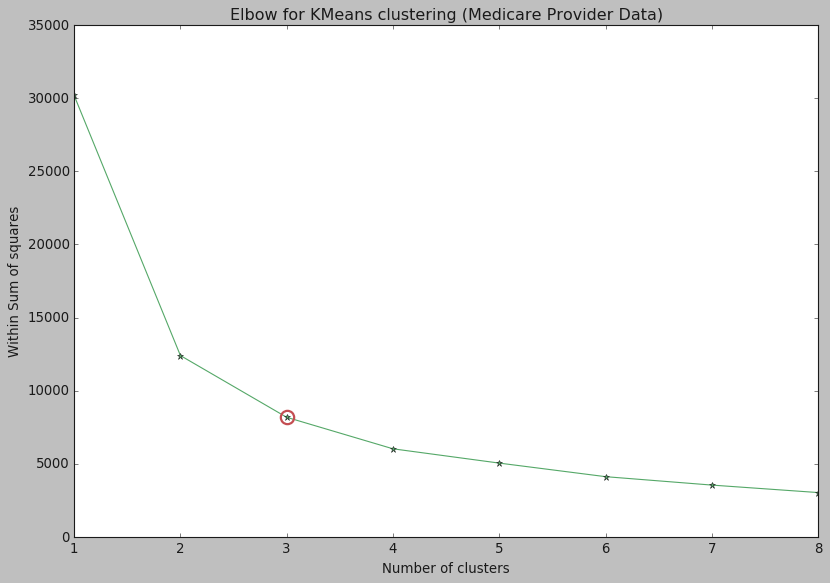

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
plt.style.use('ggplot')
ax.plot(totclust, with_in_sum_square, 'g*-')
ax.plot(totclust[2], with_in_sum_square[2], marker='o', markersize=12, 
                markeredgewidth=2, markeredgecolor='r', markerfacecolor='None')
plt.xlabel('Number of clusters')
plt.ylabel('Within Sum of squares')
plt.title('Elbow for KMeans clustering (Medicare Provider Data)')

In [45]:
km2 = KMeans(n_clusters=3)

In [46]:
km2.fit(fm6)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
y = km2.predict(fm6)

In [48]:
fm9 = fm

In [49]:
fm9['cluster'] = y

In [50]:
fm9.head()

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Full Name,difference,cluster
5081756,1548274749,DAS,SUNDEEP,NaN,M.D.,M,I,11155 DUNN RD,STE 304E,SAINT LOUIS,...,52.0,26.0,26.0,300.00,300.000000,226.878077,226.878077,SUNDEEP DAS,0.000000,0
637791,1063651768,PIDCOCK,JUSTINE,M,M.D.,F,I,701 PARK AVE # P7,HENNEPIN COUNTY MEDICAL CENTER/REVENUE MANAGEMENT,MINNEAPOLIS,...,19.0,19.0,19.0,71.10,154.000000,55.740000,57.020000,JUSTINE PIDCOCK,82.900000,1
5129362,1548562721,PREVOST,ELIZABETH,NaN,MSW,F,I,190 LENOX ST,NaN,NORWOOD,...,559.0,18.0,559.0,98.88,118.000000,76.247352,74.371145,ELIZABETH PREVOST,19.120000,2
1414308,1154332401,URBAN,MARK,A,M.D.,M,I,7373 FRANCE AVE S,SUITE 312,EDINA,...,13.0,13.0,13.0,31.26,82.923077,24.510000,25.000000,MARK URBAN,51.663077,1
5328703,1578521266,PANDIT,LALITA,H,M.D.,F,I,11160 WARNER AVE,SUITE 417,FOUNTAIN VALLEY,...,13.0,13.0,13.0,114.65,155.000000,89.890000,84.810000,LALITA PANDIT,40.350000,0


In [51]:
pd.crosstab(fm9.nppes_provider_gender, fm9.cluster, margins=True)

cluster,0,1,2,All
nppes_provider_gender,,,,
F,5219,9300,12388,26907
M,11966,28900,32227,73093
All,17185,38200,44615,100000


In [52]:
fp = km2.cluster_centers_

Text(0.5, 0.92, '3D plot of the centroids of the 3 clusters')

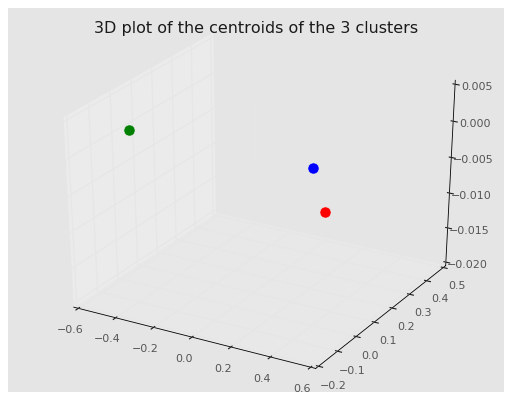

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(fp[0,0], fp[0,1], fp[0,2], s= 100, c="red")
ax.scatter(fp[1,0], fp[1,1], fp[1,2], s= 100, c="blue")
ax.scatter(fp[2,0], fp[2,1], fp[2,2], s = 100, c="green")
ax.set_title("3D plot of the centroids of the 3 clusters")

In [54]:
ddf = fm6
ddf['cluster'] = y

In [55]:
ddf1 = ddf[ddf.cluster == 0]
ddf2 = ddf[ddf.cluster == 1]
ddf3 = ddf[ddf.cluster == 2]

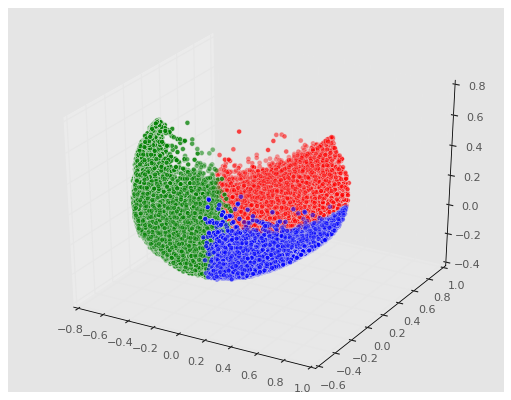

In [56]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(ddf1.comp1, ddf1.comp2, ddf1.comp3, c = "red")
ax.scatter(ddf2.comp1, ddf2.comp2, ddf2.comp3, c = "blue")
ax.scatter(ddf3.comp1, ddf3.comp2, ddf3.comp3, c = "green")

In [57]:
fm9[fm9.cluster==0][['line_srvc_cnt', 'bene_day_srvc_cnt','average_submitted_chrg_amt','average_Medicare_standard_amt']].describe()

,line_srvc_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_standard_amt
count,17185.000000,17185.000000,17185.000000,17185.000000
mean,36.421280,35.643643,181.019588,97.082563
std,32.164875,28.591226,260.104902,151.546530
min,11.000000,11.000000,8.000000,8.200909
25%,17.000000,17.000000,90.000000,50.063846
50%,26.000000,26.000000,147.245763,78.122143
75%,46.000000,45.000000,215.000000,111.290000
max,884.000000,449.000000,17353.658537,9626.387561


In [58]:
fm9[fm9.cluster==1][['line_srvc_cnt', 'bene_day_srvc_cnt','average_submitted_chrg_amt','average_Medicare_standard_amt']].describe()

,line_srvc_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_standard_amt
count,38200.000000,38200.000000,38200.000000,38200.000000
mean,38.142264,36.757801,609.858007,112.038838
std,45.973914,43.530216,1150.616261,225.126367
min,11.000000,11.000000,22.000000,0.009091
25%,15.000000,15.000000,163.433333,34.750000
50%,23.000000,23.000000,303.000000,67.910454
75%,42.000000,40.000000,618.000000,121.606250
max,1114.000000,950.000000,47431.229333,11810.620000


In [59]:
fm9[fm9.cluster==2][['line_srvc_cnt', 'bene_day_srvc_cnt','average_submitted_chrg_amt','average_Medicare_standard_amt']].describe()

,line_srvc_cnt,bene_day_srvc_cnt,average_submitted_chrg_amt,average_Medicare_standard_amt
count,44615.000000,44615.000000,44615.000000,44615.000000
mean,377.097319,220.416160,87.031779,31.841569
std,2286.797713,389.118377,90.844955,32.105306
min,11.000000,11.000000,0.010000,0.009318
25%,56.000000,49.000000,29.000000,8.150000
50%,124.000000,111.000000,59.000000,21.270000
75%,287.000000,247.000000,120.487968,50.671467
max,172160.000000,31242.000000,2919.913420,768.710000


From the description of the 3 clusters above, we can attribute a particular characteristic to each cluster.

Cluster 0 - High volume Low cost Services

Cluster 1 - Low volume High cost Services

Cluster 2 - Low volume Medium cost Services

Text(0.5, 1.0, 'Services vs Cost vs Clusters')

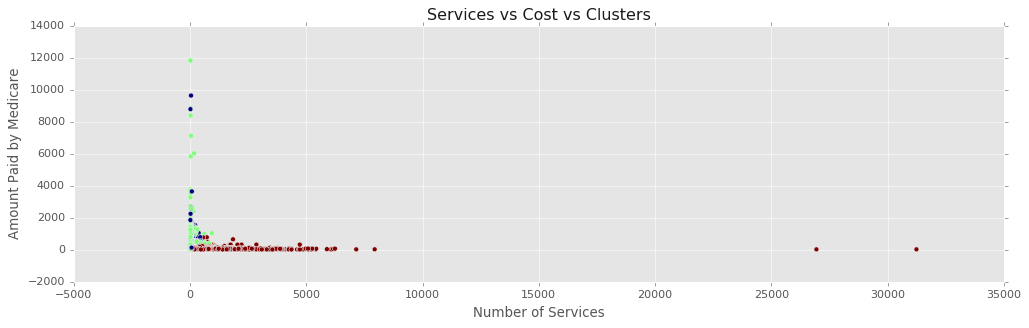

In [60]:
fig, ax = plt.subplots(figsize=(15,4))
ax.scatter(fm9['bene_day_srvc_cnt'], fm9['average_Medicare_standard_amt'], c= fm9['cluster'])
ax.set_xlabel("Number of Services")
ax.set_ylabel("Amount Paid by Medicare")
ax.set_title("Services vs Cost vs Clusters")

In [62]:
fm9[fm9['average_Medicare_standard_amt']>10000]['hcpcs_code']

684023     37227
7779048    37227
7216134    37227
Name: hcpcs_code, dtype: object

In [63]:
individuals[individuals['hcpcs_code'] == '37227']

,npi,nppes_provider_last_org_name,nppes_provider_first_name,nppes_provider_mi,nppes_credentials,nppes_provider_gender,nppes_entity_code,nppes_provider_street1,nppes_provider_street2,nppes_provider_city,...,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,bene_day_srvc_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,average_Medicare_standard_amt,Full Name,difference
61090,1003875840,ABUSHMAIES,ABEDEL,K,MD,M,I,2845 CAPITAL AVE SW,STE 201,BATTLE CREEK,...,N,15.0,14.0,15.0,13939.460000,15575.000000,10247.946667,12007.463333,ABEDEL ABUSHMAIES,1635.540000
104360,1013056365,ZEMANKIEWICZ,NORBERT,NaN,D.O.,M,I,1838 GREENE TREE RD,SUITE 285,PIKESVILLE,...,N,51.0,46.0,51.0,16498.570000,25000.000000,12932.620196,11808.360196,NORBERT ZEMANKIEWICZ,8501.430000
115417,1013122381,LAM,RUSSELL,C,M.D.,M,I,8220 WALNUT HILL LN,SUITE 615,DALLAS,...,N,202.0,125.0,202.0,15238.950000,19670.410000,11945.923911,11810.557574,RUSSELL LAM,4431.460000
135993,1013904952,ZEPHIRIN,JACQUES,A,M.D.,M,I,5801 ALLENTOWN RD,SUITE 502,CAMP SPRINGS,...,N,20.0,15.0,20.0,18028.960000,28700.000000,13427.157500,11956.455500,JACQUES ZEPHIRIN,10671.040000
164056,1013960129,OTOADESE,EROMOSELE,A,MD,M,I,146 W DALE ST,SUITE 202,WATERLOO,...,N,24.0,21.0,24.0,710.350000,2042.000000,556.910000,613.380000,EROMOSELE OTOADESE,1331.650000
185083,1013997428,SIMON,DANIEL,W,M.D.,M,I,347 MOUNT PLEASANT AVE,NaN,WEST ORANGE,...,N,24.0,19.0,24.0,17750.550000,35786.895000,13911.627917,11805.817917,DANIEL SIMON,18036.345000
199473,1023019312,PILLA,TIMOTHY,NaN,M.D.,M,I,17 W RED BANK AVE,SUITE 203,WOODBURY,...,N,19.0,18.0,19.0,821.380000,16337.894737,643.960000,613.370000,TIMOTHY PILLA,15516.514737
209599,1023045523,HADEED,SAMIR,A,M.D.,M,I,1027 BROAD ST,NaN,JOHNSTOWN,...,N,25.0,20.0,25.0,13595.200800,31982.158400,10658.640800,11810.620000,SAMIR HADEED,18386.957600
238899,1023096955,HO,JOHN,W,MD,M,I,500 17TH AVE S,SWEDISH PROVIDENCE MEDICAL CENTER,SEATTLE,...,N,21.0,18.0,21.0,716.442381,2029.000000,561.693810,613.379524,JOHN HO,1312.557619
259321,1023206505,POLENA,SOTIR,NaN,MD,M,I,172 E MAIN ST,NaN,HUNTINGTON,...,N,13.0,11.0,13.0,18223.060000,30000.000000,14286.880000,11810.620000,SOTIR POLENA,11776.940000


In [64]:
fm9[fm9['bene_day_srvc_cnt'] > 8000]['hcpcs_code']

2200744    80053
6826659    80061
Name: hcpcs_code, dtype: object

In [65]:
individuals[individuals['hcpcs_code'] == '80053'][['bene_day_srvc_cnt', 'average_Medicare_standard_amt']].describe()

,bene_day_srvc_cnt,average_Medicare_standard_amt
count,25278.000000,25278.000000
mean,302.720904,11.878940
std,778.458665,1.763281
min,11.000000,0.000000
25%,40.000000,10.894721
50%,129.000000,12.092407
75%,365.750000,13.188170
max,66101.000000,18.805000
